In [241]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [242]:
x,y = make_classification(n_samples = 1000,n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [243]:
x

array([[-0.20535429, -6.26044883],
       [-0.31575309, -4.27356396],
       [-0.25640262, -5.87431445],
       ...,
       [-0.42153598,  0.78985803],
       [ 0.37325639,  1.09864574],
       [-0.06012331, -4.70068359]])

In [244]:
df = pd.DataFrame(x)

In [245]:
df['label'] = y

In [246]:
df.rename(columns = {0:'X1',1:'X2'},inplace = True)

In [248]:
df

,X1,X2,label
0,-0.205354,-6.260449,0
1,-0.315753,-4.273564,0
2,-0.256403,-5.874314,0
3,-0.619268,-5.575088,0
4,-1.203394,0.702708,1
...,...,...,...
995,1.098652,0.701263,1
996,1.765977,1.129570,1
997,-0.421536,0.789858,1
998,0.373256,1.098646,1


In [249]:
X0 = [1 for i in range(1000)]

In [250]:
df.insert(0, 'X0', X0)

In [251]:
df

,X0,X1,X2,label
0,1,-0.205354,-6.260449,0
1,1,-0.315753,-4.273564,0
2,1,-0.256403,-5.874314,0
3,1,-0.619268,-5.575088,0
4,1,-1.203394,0.702708,1
...,...,...,...,...
995,1,1.098652,0.701263,1
996,1,1.765977,1.129570,1
997,1,-0.421536,0.789858,1
998,1,0.373256,1.098646,1


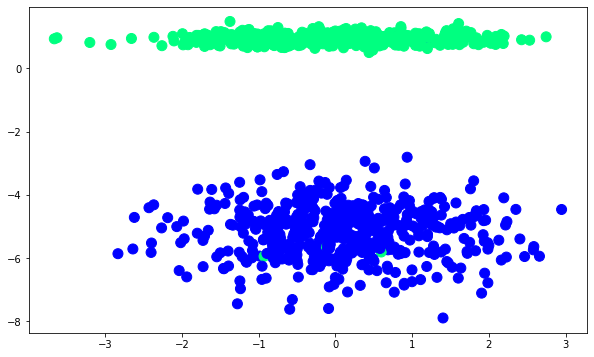

In [252]:
plt.figure(figsize=(10, 6))
plt.scatter(df['X1'],df['X2'],c=df['label'],cmap='winter',s=100)

In [253]:
df_label_drop = df.drop('label',axis =1)

In [254]:
df_label_drop

,X0,X1,X2
0,1,-0.205354,-6.260449
1,1,-0.315753,-4.273564
2,1,-0.256403,-5.874314
3,1,-0.619268,-5.575088
4,1,-1.203394,0.702708
...,...,...,...
995,1,1.098652,0.701263
996,1,1.765977,1.129570
997,1,-0.421536,0.789858
998,1,0.373256,1.098646


In [184]:
#np.dot(df_label_drop.iloc[0],[1,1,1])

In [300]:
# We need to get the w0,w1 and w2 for the line in a such a way that line seprates the two categories.
def perceptron(df):
    epoc = 1000
    lr = 0.1
    df_label_drop = df.drop('label',axis =1)
    wt = np.ones(df.drop('label',axis = 1).shape[1])
    for i in range(epoc):
        j = np.random.randint(400)
        y = df.iloc[j]['label']
        z = np.dot(df_label_drop.iloc[j],wt)
        y_hat = step(z)
        wt = wt+lr*(y-y_hat)*df_label_drop.iloc[j]
    return wt

In [301]:
def step(z):
    return 1 if z>0 else 0

In [302]:
wt = perceptron(df)
wt

X0    0.600000
X1    0.070542
X2    0.584640
dtype: float64

In [303]:
## Get the intercepet and coeff
intercept = wt[0]
w1,w2 = wt[1:]

In [304]:
print(w1)
print(w2)

0.07054233296058512
0.5846401369660871


In [305]:
slope = -w1/w2
intercept = -intercept/w2

In [306]:
slope,intercept

(-0.12065940824154713, -1.0262723375675522)

In [307]:
x_data = np.linspace(-10,50,50)
y_data = slope*x_data+intercept

In [308]:
len(y_data)

50

(-3.0, 3.0)

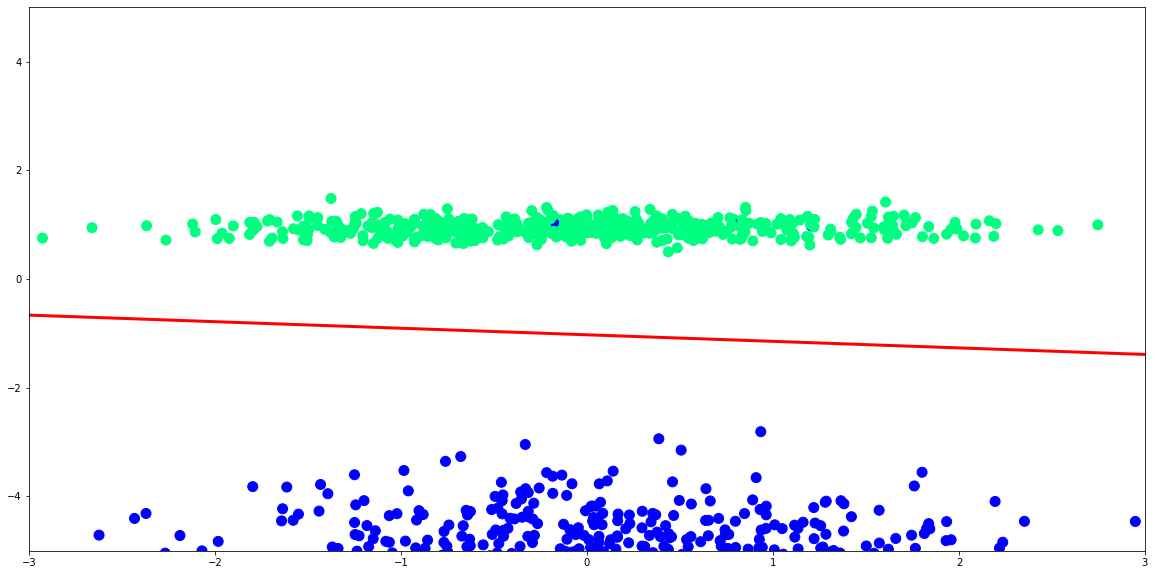

In [309]:
plt.figure(figsize=(20,10))
plt.plot(x_data,y_data,color='red',linewidth=3)
plt.scatter(df['X1'],df['X2'],c=df['label'],cmap='winter',s=100)
plt.ylim(-5,5)
plt.xlim(-3,3)

## It has a drawback, once the points are classifie properly the algorithm stops, the model doesn't learn further, it doesn't improve itself further.
## This output of trick depends on how two classes are seperated <class_sep>, for the same data if the sepration is wider the model would more precisely classify the points.

# Using the Gradient descent to solve the lOSS FUNCTION to get the optimized value of weight so that loss function could be minimized.

In [474]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [500]:
x,y = make_classification(n_samples = 1000,n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [501]:
df = pd.DataFrame(x)
df

,0,1
0,-0.205354,-6.260449
1,-0.315753,-4.273564
2,-0.256403,-5.874314
3,-0.619268,-5.575088
4,-1.203394,0.702708
...,...,...
995,1.098652,0.701263
996,1.765977,1.129570
997,-0.421536,0.789858
998,0.373256,1.098646


In [502]:
df.rename(columns={0:'X1',1:'X2'},inplace = True)

In [503]:
label = [1 for i in range(1000)]

In [504]:
df.insert(0, 'X0', label)

In [505]:
df['X0'] = label

In [506]:
df

,X0,X1,X2
0,1,-0.205354,-6.260449
1,1,-0.315753,-4.273564
2,1,-0.256403,-5.874314
3,1,-0.619268,-5.575088
4,1,-1.203394,0.702708
...,...,...,...
995,1,1.098652,0.701263
996,1,1.765977,1.129570
997,1,-0.421536,0.789858
998,1,0.373256,1.098646


In [507]:
df.columns

Index(['X0', 'X1', 'X2'], dtype='object')

In [508]:
df

,X0,X1,X2
0,1,-0.205354,-6.260449
1,1,-0.315753,-4.273564
2,1,-0.256403,-5.874314
3,1,-0.619268,-5.575088
4,1,-1.203394,0.702708
...,...,...,...
995,1,1.098652,0.701263
996,1,1.765977,1.129570
997,1,-0.421536,0.789858
998,1,0.373256,1.098646


In [509]:
df['y'] = y

In [510]:
df

,X0,X1,X2,y
0,1,-0.205354,-6.260449,0
1,1,-0.315753,-4.273564,0
2,1,-0.256403,-5.874314,0
3,1,-0.619268,-5.575088,0
4,1,-1.203394,0.702708,1
...,...,...,...,...
995,1,1.098652,0.701263,1
996,1,1.765977,1.129570,1
997,1,-0.421536,0.789858,1
998,1,0.373256,1.098646,1


In [424]:
df['y']

0      0
1      0
2      0
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    0
Name: y, Length: 1000, dtype: int32

In [460]:
# plt.figure(figsize= (10,5))
# plt.scatter(df['X1'],df['X2'],c=df['y'],cmap = 'winter',s=100)
# plt.figure(figsize= (10,5))
# plt.scatter(x,c=df['y'],cmap = 'winter',s=100)
# x = np.insert(x,0,1,axis = 1)
# x.shape
np.ones(x.shape[1])

array([1., 1., 1.])

In [426]:
# def gd(x,y):
#     for i in range(3000):
        
#         wt = np.ones(x.shape[1])
#         lr = 0.5

array([1., 1., 1.])

In [485]:
df

,X0,X1,X2,y
0,1,-0.205354,-9.657033,0
1,1,-0.315753,-7.670148,0
2,1,-0.256403,-9.270898,0
3,1,-0.619268,-8.971672,0
4,1,-1.203394,1.326676,1
...,...,...,...,...
995,1,1.098652,1.325231,1
996,1,1.765977,1.753538,1
997,1,-0.421536,1.413826,1
998,1,0.373256,1.722614,1


In [541]:
def gradient_descent(df):
    wt= np.ones(df.drop('y',axis = 1).shape[1])
    lr = 0.5
    for i in range(3000):
        y = df['y']
        y_hat = sigmoid(np.dot(df.drop('y',axis = 1),wt))
        wt = wt+lr*(np.dot((y-y_hat),df.drop('y',axis = 1)/df.shape[0]))
    return wt

In [542]:
# wt= np.ones(df.drop('y',axis = 1).shape[1])
# x= df.drop('y',axis = 1)
# x
wt= np.ones(df.drop('y',axis = 1).shape[1])
np.dot([1,-0.205354,-7.958741],wt)

-7.164095

In [543]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [544]:
wt = gradient_descent(df)

In [545]:
wt

array([ 3.05805599, -0.36871773,  1.70307846])

In [433]:
# wt,y_hat,y

In [546]:
intercept_= wt[0]
a = wt[1]
b = wt[2]

In [547]:
intercept_,a,b

(3.058055992423005, -0.36871773267780694, 1.703078464379548)

In [548]:
slope = -a/b
intercept_=-intercept_/b

In [549]:
slope,intercept_

(0.21650073111113835, -1.7956048745746378)

In [550]:
x_data = np.linspace(-10,50,50)
y_data = slope*x_data+intercept_

In [551]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty = 'none' , solver = 'sag')
x  = df.drop(['y','X0'],axis = 1)
y = df['y']
lor.fit(x,y)

LogisticRegression(penalty='none', solver='sag')

In [552]:
print(lor.coef_)
print(lor.intercept_)

[[-0.36880418  1.70328746]]
[3.0581698]


In [553]:
slope = -(lor.coef_[0][0]/lor.coef_[0][1])
intercept = -(lor.intercept_/lor.coef_[0][1])
slope,intercept

(0.21652491760078452, array([-1.79545137]))

In [554]:
x_data_ = np.linspace(-10,50,50)
y_data_ = slope*x_data+intercept

(-5.0, 5.0)

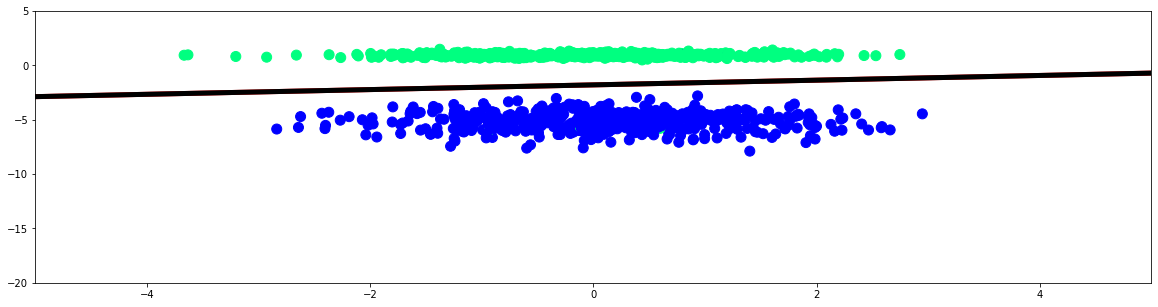

In [558]:
plt.figure(figsize= (20,5))
plt.plot(x_data,y_data,color='red',linewidth=5)
plt.plot(x_data_,y_data_,color='black',linewidth=5)
plt.scatter(df['X1'],df['X2'],c=df['y'],cmap='winter',s=100)
plt.ylim(-20,5)
plt.xlim(-5,5)

In [ ]:
## perciptron trick ends here..

In [17]:
import pandas as pd
df_emp = pd.DataFrame({'employee_id':[2,3,7,8,9],'name':['meir','michael','addilyn','juan','kannon'],'salary':[3000,3800,7400,6100,7700]})


In [18]:
df_emp

,employee_id,name,salary
0,2,meir,3000
1,3,michael,3800
2,7,addilyn,7400
3,8,juan,6100
4,9,kannon,7700


In [87]:
df_emp['bonus'] = df_emp.apply(lambda x : x["salary"] if(x["name"][0]!="m" and x["employee_id"]%2!=0)else 0,axis =1)

In [90]:
df_emp[['employee_id','bonus']].sort_values(['employee_id','bonus'])

,employee_id,bonus
0,2,0
1,3,0
2,7,7400
3,8,0
4,9,7700


In [99]:
type(df_emp['name'].str.lower().str.startswith('m'))

pandas.core.series.Series

In [77]:
df_emp["bonus"] = df_emp.apply(lambda x : x["salary"] if x["employee_id"] % 2 != 0 and x["name"][0] != "M" else 0, axis = 1)

In [78]:
df_emp

,employee_id,name,salary,bonus
0,2,meir,3000,0
1,3,michael,3800,3800
2,7,addilyn,7400,7400
3,8,juan,6100,0
4,9,kannon,7700,7700


In [81]:
df_emp["name"][0]

'meir'

In [71]:
df_emp['name'].str.startswith('M')
#startswith('M')

0    False
1    False
2    False
3    False
4    False
Name: name, dtype: bool

In [3]:
df_emp[(df_emp['employee_id']%2!=0])&(df_emp['name']%2!=0])]

,employee_id,name,salary
1,3,michael,3800
2,7,addilyn,7400
4,9,kannon,7700


In [36]:
for index, val in df_emp[df_emp['employee_id']%2!=0].iterrows():
    print(f"index:{index}")
    print(f"value:\n{val}")

index:1
value:
employee_id          3
name           michael
salary            3800
Name: 1, dtype: object
index:2
value:
employee_id          7
name           addilyn
salary            7400
Name: 2, dtype: object
index:4
value:
employee_id         9
name           kannon
salary           7700
Name: 4, dtype: object


In [42]:
for index, val in df_emp[df_emp['employee_id']%2!=0].iterrows():
    #print(f"index:{index}")
    #print(f"value:\n{val['name']}")
    print(val['name'][0].upper()!='M')

False
True
True


In [68]:
def fun(df_emp):
    lis = []
    y = df_emp
    df_emp = df_emp[df_emp['employee_id']%2!=0]
    print(df_emp.shape[0])
    for i in df_emp.index:
        if (df_emp['name'][i][0].upper()!='M'):
            lis.append(df_emp['name'][i])
        else:
            continue
    x = df_emp[df_emp['name'].isin(lis)]
    z = y[~y['name'].isin(lis)]
    x['Bonus'] = x['salary']
    df1 = x[['employee_id','Bonus']]
    z['Bonus'] = 0 
    df2 = z[['employee_id','Bonus']]
    final_df = pd.concat([df1,df2],keys=['employee_id', 'employee_id'],ignore_index  = True)
    return final_df.sort_values(by ='employee_id',ascending = True)

In [69]:
s = fun(df_emp)
s

3


C:\Users\kamle\AppData\Local\Temp/ipykernel_17116/4136135337.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Bonus'] = x['salary']
C:\Users\kamle\AppData\Local\Temp/ipykernel_17116/4136135337.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Bonus'] = 0


,employee_id,Bonus
2,2,0
3,3,0
0,7,7400
4,8,0
1,9,7700


In [110]:
df_emp = df_emp[df_emp['employee_id']%2!=0]
for i in df_emp.index:
    print(i)

1
2
4


In [94]:
df_emp['name']

1    michael
2    addilyn
4     kannon
Name: name, dtype: object

In [71]:
df_emp

,employee_id,name,salary
0,2,meir,3000
1,3,michael,3800
2,7,addilyn,7400
3,8,juan,6100
4,9,kannon,7700


In [69]:
df_emp['name']

0       meir
1    michael
2    addilyn
3       juan
4     kannon
Name: name, dtype: object

In [30]:
# Iterating through the Series with iteritems()
name = df_emp['name']
for index, value in name.iteritems():
    print(f"Index: {index}, Value: {value[0]}")

Index: 0, Value: m
Index: 1, Value: m
Index: 2, Value: a
Index: 3, Value: j
Index: 4, Value: k


In [16]:
def fun(lis):
    x = lis
    y = []
    min_ = min(x)
    max_ = max(x)
    for i in range(len(x)-1):
        if min_+1 not in x:
            y.append(min_+1)
    return y

In [17]:
A=[6,10,13,17,23]
y = fun(A)

In [18]:
y

[7, 7, 7, 7]

In [32]:
def fun(a):
    latest_dup=a[0]
    for i in range(0,len(a)-1):
        for j in range(len(a)-1,0):
            if a [i] == a[j]:
                latest_dup = a[i]
            else:
                break
    return latest_dup

In [33]:
a = [1,2,3,4,5,4,1,3,6]
latest_dup = fun(a)
latest_dup

1

In [55]:
def fun(lis):
    min_ = min(A)
    max_ = max(A)
    lis = [i for i in range(min_,max_)]
    for i in lis:
        if i in A:
            lis.remove(i)
    return lis

In [56]:
A=[6,10,13,17,23]
lis_ = fun(A)
lis_

[7, 8, 9, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22]

In [40]:
lis.pop(6)

12

In [52]:
lis = [6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
lis.pop(1)


7

In [1]:
import pandas as pd
df = pd.DataFrame({ 'product_id': [0, 1], 'store1': [95, 70], 'store2': [100, 80], 'store3': [105, 85] })

In [2]:
df

,product_id,store1,store2,store3
0,0,95,100,105
1,1,70,80,85


In [4]:
product_ids = [] 
stores = [] 
values = []

In [12]:
for idx, row in df.iterrows():
    print(type(row))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [9]:
product_id

1

In [1]:
import numpy as np
import pandas as pd